In [34]:
# Day 88 - Model Interpretability & Explainability
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# ---------------- Dataset ----------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# ---------------- Train Model ----------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
# ---------------- Model Evaluation ----------------
preds = model.predict(X_test)
print("✅ Accuracy:", round(accuracy_score(y_test, preds), 3))

✅ Accuracy: 0.965


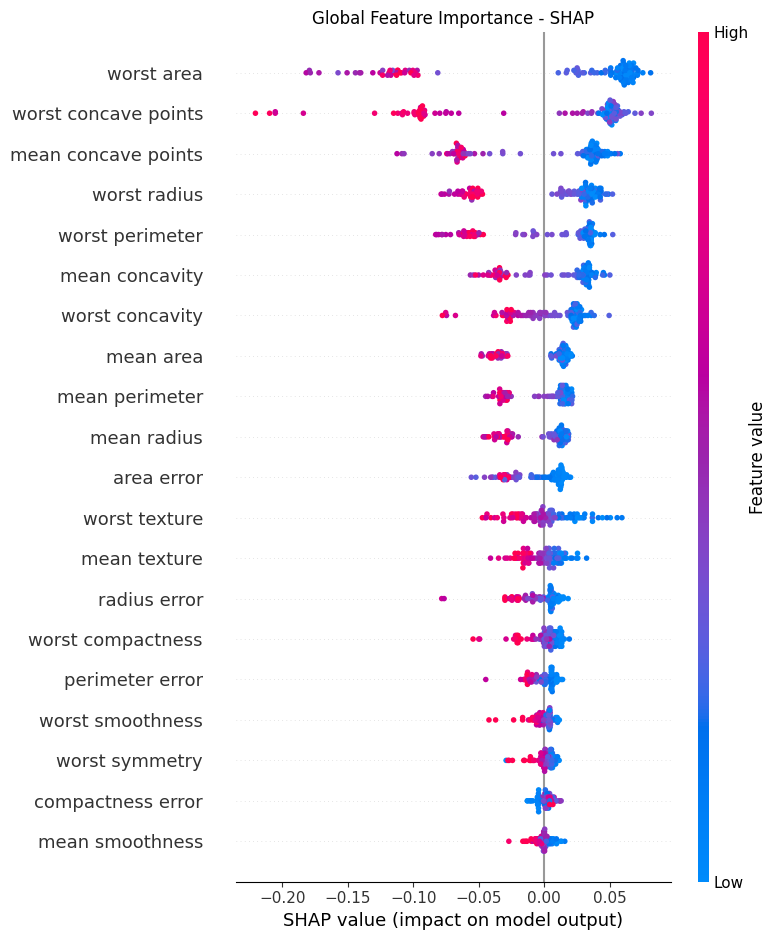


🔍 Explaining prediction for sample 5


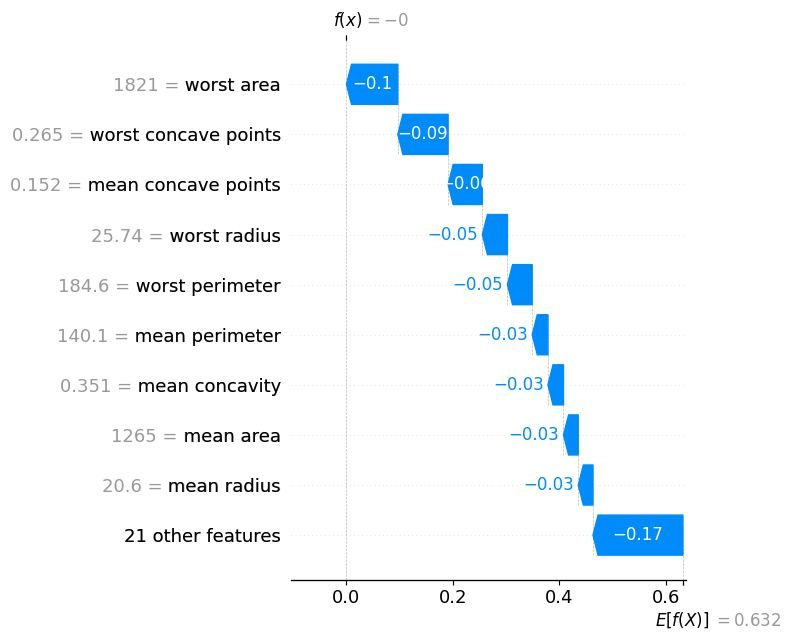

In [37]:
# ---------------- SHAP EXPLAINABILITY ----------------
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Handle SHAP values format (may be array or list depending on version)
if isinstance(shap_values, list):
    shap_values_class1 = shap_values[1]
    expected_value = explainer.expected_value[1]
else:
    # For newer SHAP versions, might return single array
    # Check if it's 3D (samples, features, classes)
    if len(shap_values.shape) == 3:
        shap_values_class1 = shap_values[:, :, 1]
        expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value
    else:
        shap_values_class1 = shap_values
        expected_value = explainer.expected_value if np.isscalar(explainer.expected_value) else explainer.expected_value[1]

# Global Feature Importance
shap.summary_plot(shap_values_class1, X_test, show=False)
plt.title("Global Feature Importance - SHAP")
plt.tight_layout()
plt.show()

# Local Explanation for a single prediction
sample_idx = 5
print(f"\n🔍 Explaining prediction for sample {sample_idx}")

# Create explanation object for single prediction
# Ensure we're getting a 1D array for the single sample
single_sample_shap = shap_values_class1[sample_idx]
if len(single_sample_shap.shape) > 1:
    single_sample_shap = single_sample_shap.flatten()

shap_explanation = shap.Explanation(
    values=single_sample_shap,
    base_values=float(expected_value),
    data=X_test.iloc[sample_idx].values,
    feature_names=X_test.columns.tolist()
)
shap.plots.waterfall(shap_explanation, show=False)
plt.tight_layout()
plt.show()

C:\Users\amank\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



📊 LIME Explanation:
Top features contributing to prediction:
  worst area > 1031.50: -0.1592
  worst concave points > 0.16: -0.1275
  worst perimeter > 124.65: -0.0963
  worst radius > 18.41: -0.0777
  worst texture > 29.69: -0.0631
  worst concavity > 0.39: -0.0617
  mean concave points > 0.07: -0.0609
  area error > 43.73: -0.0547
  mean concavity > 0.13: -0.0492
  mean area > 767.60: -0.0355


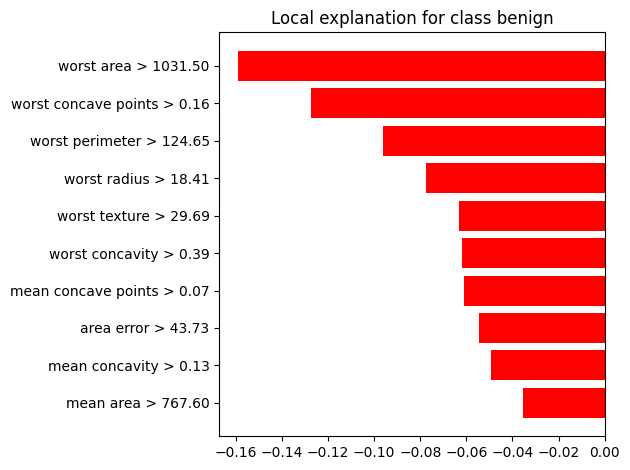

In [39]:
 #---------------- LIME EXPLAINABILITY ----------------
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns.tolist(),
    class_names=data.target_names.tolist(),
    mode='classification'
)

# Explain a single prediction
sample = X_test.iloc[sample_idx].values  # Convert to numpy array
exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=model.predict_proba
)

# Display LIME explanation
print("\n📊 LIME Explanation:")
try:
    # Works in Jupyter notebooks
    exp.show_in_notebook(show_table=True)
except:
    # Alternative for non-notebook environments
    print("Top features contributing to prediction:")
    for feature, weight in exp.as_list():
        print(f"  {feature}: {weight:.4f}")
    
    # Save LIME plot
    fig = exp.as_pyplot_figure()
    plt.tight_layout()
    plt.show()

In [40]:
# ---------------- Key Outputs ----------------
print("\n" + "="*60)
print("📈 Key Outputs Generated:")
print("="*60)
print("✓ SHAP summary plot → global feature importance")
print("✓ SHAP force/waterfall plot → explains why one prediction was made")
print("✓ LIME explanation → local interpretability of one prediction")
print("="*60)


📈 Key Outputs Generated:
✓ SHAP summary plot → global feature importance
✓ SHAP force/waterfall plot → explains why one prediction was made
✓ LIME explanation → local interpretability of one prediction
